In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
arr = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        arr.append(os.path.join(dirname, filename))

# print(arr)
trainDataPath = arr[0]
testDataPath = arr[1]

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(testDataPath)
print(trainDataPath)

/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/test_data.csv
/kaggle/input/a-fine-windy-day-hackerearth-ml-challenge/train_data.csv


# Dataset Import

In [3]:
df_train = pd.read_csv(r"{}".format(trainDataPath))
df_test = pd.read_csv(r"{}".format(testDataPath))


# Analysing Data

In [4]:
# Printing Column info. - For Train Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [5]:
# Printing Column info. - For Test Data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [6]:
# Cheking for unique values under each column - For Train data
df_train.nunique()


tracking_id                       28200
datetime                          28200
wind_speed(m/s)                   27727
atmospheric_temperature(°C)       20809
shaft_temperature(°C)             27625
blades_angle(°)                   22830
gearbox_temperature(°C)           27911
engine_temperature(°C)            28188
motor_torque(N-m)                 27660
generator_temperature(°C)         28187
atmospheric_pressure(Pascal)      25492
area_temperature(°C)              28170
windmill_body_temperature(°C)     21893
wind_direction(°)                 22984
resistance(ohm)                   27365
rotor_torque(N-m)                 25945
turbine_status                       14
cloud_level                           3
blade_length(m)                   22833
blade_breadth(m)                  28200
windmill_height(m)                27657
windmill_generated_power(kW/h)    27988
dtype: int64

In [7]:
# Cheking for unique values under each column - For Test data
df_test.nunique()


tracking_id                      12086
datetime                         12086
wind_speed(m/s)                  11875
atmospheric_temperature(°C)       8988
shaft_temperature(°C)            11839
blades_angle(°)                   9820
gearbox_temperature(°C)          11952
engine_temperature(°C)           12081
motor_torque(N-m)                11856
generator_temperature(°C)        12081
atmospheric_pressure(Pascal)     10935
area_temperature(°C)             12075
windmill_body_temperature(°C)     9459
wind_direction(°)                 9885
resistance(ohm)                  11727
rotor_torque(N-m)                11128
turbine_status                      14
cloud_level                          3
blade_length(m)                   9849
blade_breadth(m)                 12086
windmill_height(m)               11831
dtype: int64

In [8]:
#Checking no. of null values in each column - For Train data
df_train.isna().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [9]:
#Checking no. of null values in each column - For Test data
df_test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

# Printing Correlation Matrix

In [10]:
corr_train = df_train.corr()

In [11]:
corr_train.style.background_gradient(cmap="coolwarm")


,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
wind_speed(m/s),1.000000,0.052363,0.038500,-0.003593,0.016240,0.154659,0.377897,0.427604,-0.121641,0.198772,0.028000,0.045681,0.236767,0.152735,0.006996,0.003903,-0.011933,0.062754
atmospheric_temperature(°C),0.052363,1.000000,0.011944,0.007429,0.005955,0.050748,0.095394,0.117335,-0.023382,0.073553,0.008472,0.018082,0.061556,0.044131,0.000567,0.003729,0.001270,-0.001005
shaft_temperature(°C),0.038500,0.011944,1.000000,-0.009692,0.029967,0.204034,0.071366,0.074695,-0.018744,0.087570,0.018121,0.020066,0.032219,0.027989,0.000145,-0.006120,-0.008823,0.046552
blades_angle(°),-0.003593,0.007429,-0.009692,1.000000,-0.025215,-0.064848,-0.138646,-0.044344,0.009316,-0.076014,0.003258,-0.027141,-0.033415,-0.048541,-0.009242,-0.061279,0.002717,-0.154808
gearbox_temperature(°C),0.016240,0.005955,0.029967,-0.025215,1.000000,0.132756,0.045057,0.045125,-0.008589,0.058875,0.017249,0.029088,0.021098,0.016662,-0.002677,0.011283,0.003853,0.053192
engine_temperature(°C),0.154659,0.050748,0.204034,-0.064848,0.132756,1.000000,0.352509,0.360616,-0.061328,0.342259,0.089745,0.137448,0.208365,0.138721,-0.007294,0.011560,-0.011952,0.272597
motor_torque(N-m),0.377897,0.095394,0.071366,-0.138646,0.045057,0.352509,1.000000,0.934950,-0.215039,0.475887,0.028134,0.212269,0.513372,0.390499,0.005023,0.052973,0.001177,0.505553
generator_temperature(°C),0.427604,0.117335,0.074695,-0.044344,0.045125,0.360616,0.934950,1.000000,-0.238989,0.517243,0.036341,0.212498,0.539554,0.371918,0.005362,0.017573,-0.000638,0.391820
atmospheric_pressure(Pascal),-0.121641,-0.023382,-0.018744,0.009316,-0.008589,-0.061328,-0.215039,-0.238989,1.000000,-0.091428,-0.009015,-0.028435,-0.128475,-0.093835,0.005462,0.005022,0.002784,-0.013310
area_temperature(°C),0.198772,0.073553,0.087570,-0.076014,0.058875,0.342259,0.475887,0.517243,-0.091428,1.000000,0.050754,0.200037,0.266673,0.187335,0.000074,0.022397,-0.005301,0.384564


**generator_temperature** and **motor_torque** seem to be the most correlated hence we can retain one of the two.

---

# Finding out Categorical and Numerical Features

In [12]:
def splitFeatures(df):
    numeric_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return (numeric_features,categorical_features)

num_features_train,cat_features_train = splitFeatures(df_train)

#Print Numerical Features
print("\n\n\n\t\t\tNumerical Features\n\n",num_features_train)

#Print Categorical Features
print("\n\n\n\t\t\tCategorical Features\n\n",cat_features_train)




			Numerical Features

        wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
0            94.820023                   -99.000000              41.723019   
1           241.832734                    27.764785             -99.000000   
2            95.484724                          NaN              41.855473   
3           238.819424                   -99.000000              45.443914   
4            10.722890                          NaN              41.981183   
...                ...                          ...                    ...   
28195        94.765699                    23.576793              45.399352   
28196        94.196738                    24.034329              42.068979   
28197        94.160463                    28.674296              45.004213   
28198        95.430377                    26.560254              48.032624   
28199        43.558352                    18.721231               9.220208   

       blades_angle(°)  gearbox_temp

In [13]:
## Copying the train dataframe into new dataframe and we will be performing changes on the new dataframe
df_cpy = df_train.copy()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def comparing_train_and_test_feature(df,df_test,col):
    fig = plt.figure(figsize=(16,10))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    df[col].plot(kind='kde',ax=ax0)
    df_test[col].plot(kind='kde',ax=ax1)
    ax0.set_xlabel(col)
    ax1.set_xlabel(col)
    ax0.set_title("Density plot of " + str(col) + " of training set")
    ax1.set_title("Density plot of " + str(col) + " of testing set")
    plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


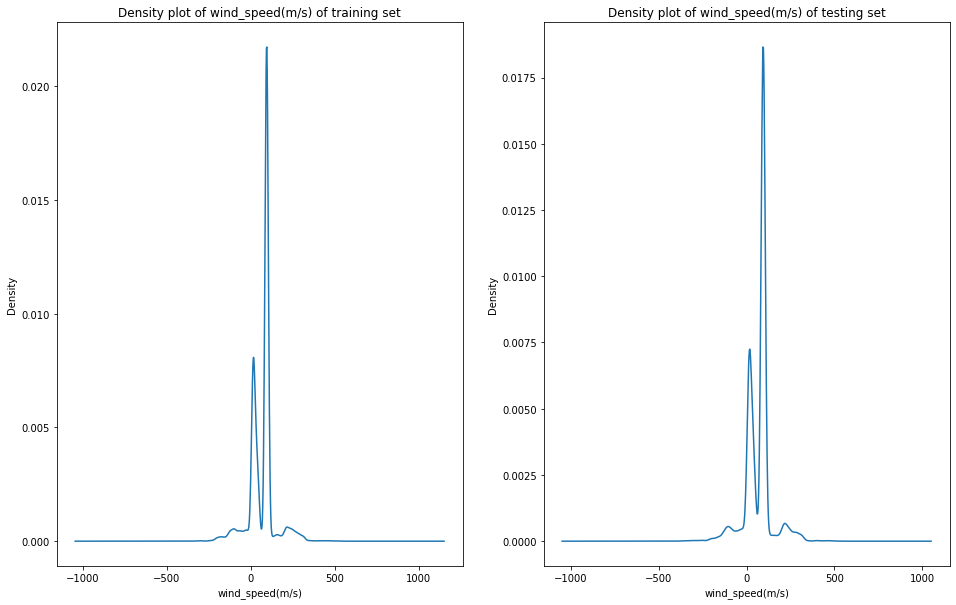

In [16]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'wind_speed(m/s)')
## Distribution of Feature wind_speed(m/s) of training and testing dataset are very similar

<AxesSubplot:xlabel='wind_speed(m/s)', ylabel='windmill_generated_power(kW/h)'>

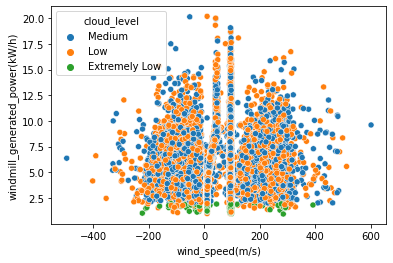

In [17]:
sns.scatterplot(x='wind_speed(m/s)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


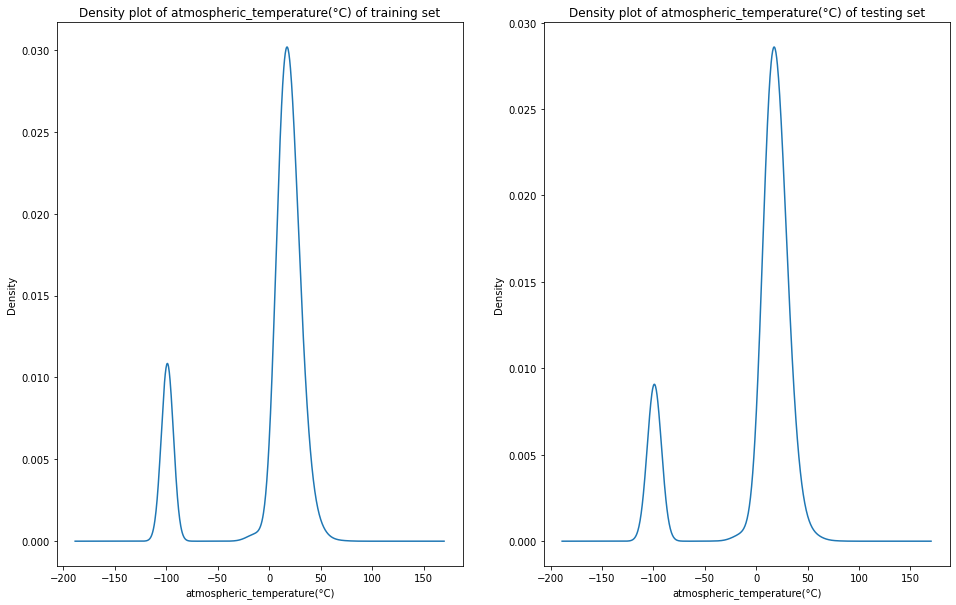

In [18]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'atmospheric_temperature(°C)')
## Distribution of Feature "atmospheric_temperature(°C)" of training and testing dataset is very similar

<AxesSubplot:xlabel='atmospheric_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

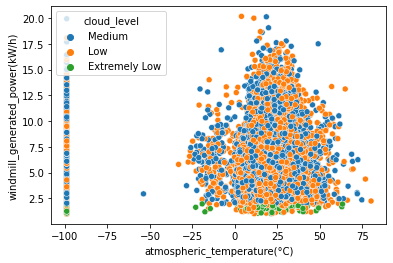

In [19]:
sns.scatterplot(x='atmospheric_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

From the above density plot of feature "atmospheric_temperature(°C)", we see that the dist. of "atmospheric_temperature(°C)" is same in training and testing dataset, hence we retain.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


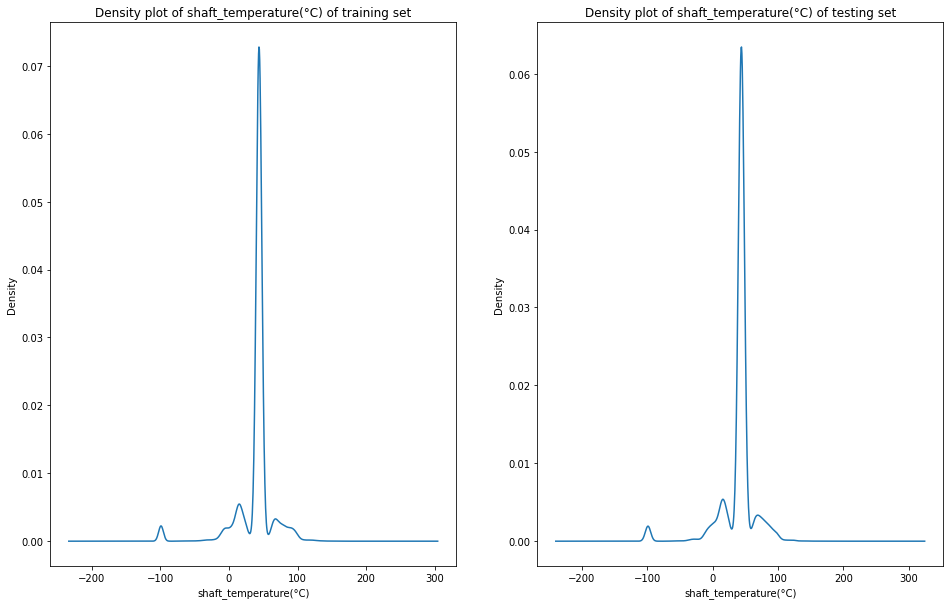

In [20]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'shaft_temperature(°C)')
## Distribution of Feature "shaft_temperature(°C)" of training and testing dataset are almost same

<AxesSubplot:xlabel='shaft_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

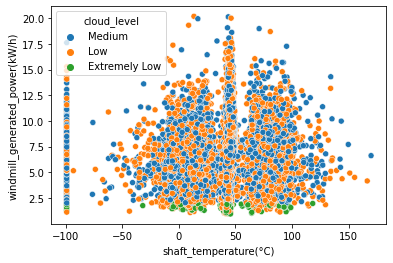

In [21]:
sns.scatterplot(x='shaft_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


From the above density plot of feature "shaft_temperature(°C)", we found that the distribution of "shaft_temperature(°C)" is almost same in training and testing dataset, so we are not changing anything in it.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


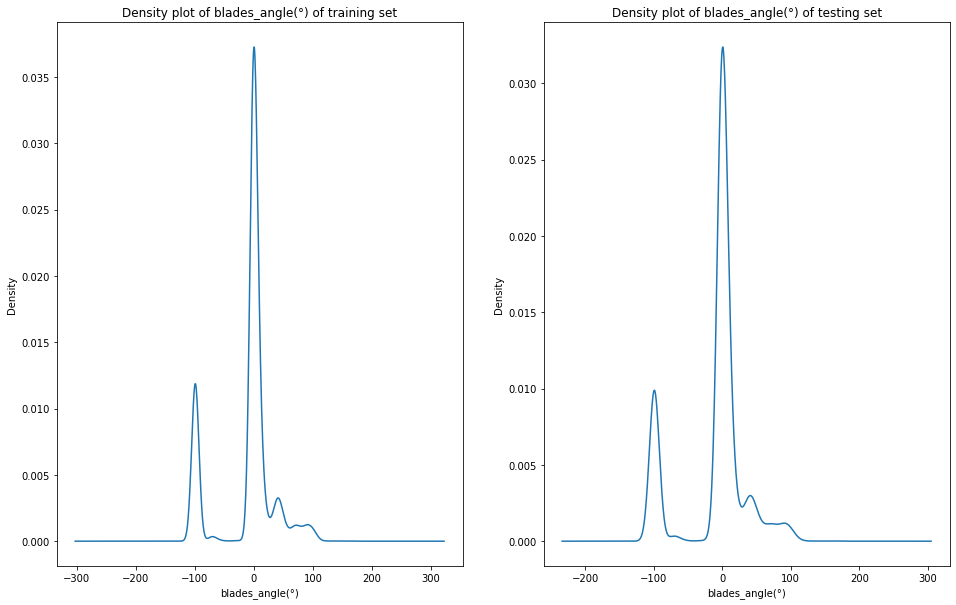

In [22]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df_train,df_test,'blades_angle(°)')
## Distribution of Feature "blades_angle(°)" of training and testing dataset are almost same

<AxesSubplot:xlabel='blades_angle(°)', ylabel='windmill_generated_power(kW/h)'>

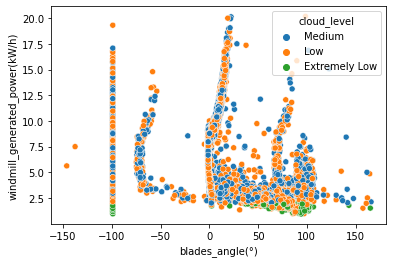

In [23]:
sns.scatterplot(x='blades_angle(°)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)


In [24]:
## Here we are removing extreme outliers which are present in a very less number
low = df_cpy['gearbox_temperature(°C)'] < -200
high = df_cpy['gearbox_temperature(°C)'] > 300
low = np.where(low)
high = np.where(high)
df_cpy.drop(low[0],inplace=True)
df_cpy.drop(high[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

<AxesSubplot:xlabel='gearbox_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

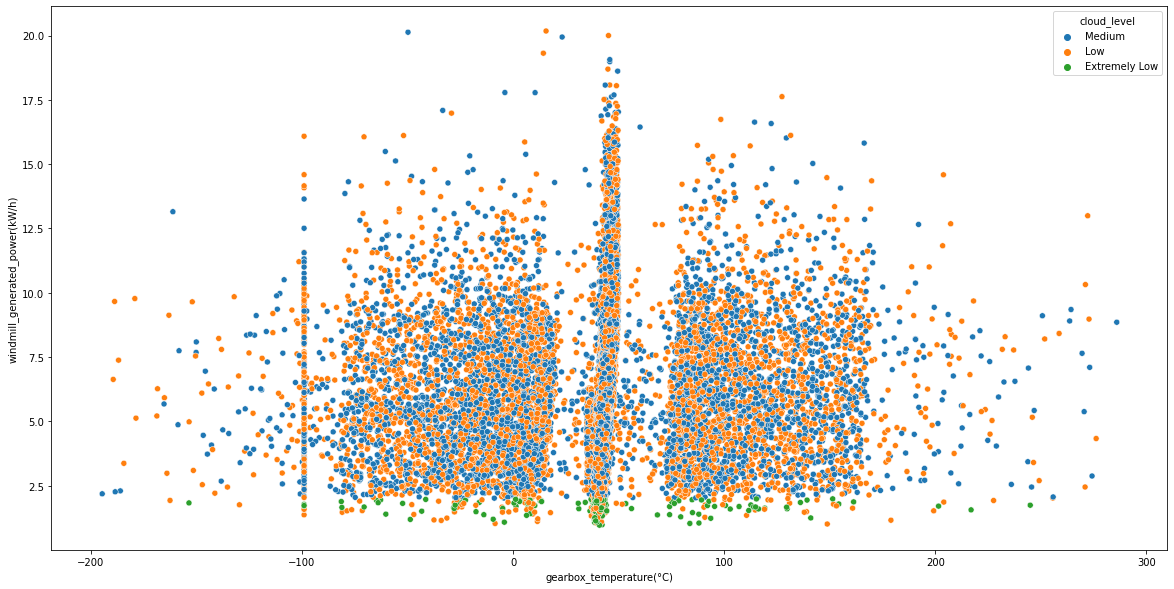

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_cpy)


In [26]:
## Removing extreme outliers
low = df_cpy['blade_length(m)'] < -20
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

In [27]:
## Droping extreme outliers
low = df_cpy['area_temperature(°C)'] < 10
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

In [28]:
## Dropping extreme outliers
low = df_cpy['engine_temperature(°C)'] < 38
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

# Data Prepping

In [29]:
df_cpy.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
df_test.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)

**Replacing NA values with mean (numerical qty) and mode (categorical qty.)**

In [30]:
df_cpy['gearbox_temperature(°C)'].fillna(df_cpy['gearbox_temperature(°C)'].mean(),inplace=True)
df_cpy['area_temperature(°C)'].fillna(df_cpy['area_temperature(°C)'].mean(),inplace=True)
df_cpy['rotor_torque(N-m)'].fillna(df_cpy['rotor_torque(N-m)'].mean(),inplace=True)
df_cpy['blade_length(m)'].fillna(df_cpy['blade_length(m)'].mean(),inplace=True)
df_cpy['blade_breadth(m)'].fillna(df_cpy['blade_breadth(m)'].mean(),inplace=True)
df_cpy['windmill_height(m)'].fillna(df_cpy['windmill_height(m)'].mean(),inplace=True)
df_cpy['cloud_level'].fillna(df_cpy['cloud_level'].mode()[0],inplace=True)
df_cpy['atmospheric_temperature(°C)'].fillna(df_cpy['atmospheric_temperature(°C)'].mean(),inplace=True)
df_cpy['atmospheric_pressure(Pascal)'].fillna(df_cpy['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_cpy['wind_speed(m/s)'].fillna(df_cpy['wind_speed(m/s)'].mean(),inplace=True)
df_cpy['shaft_temperature(°C)'].fillna(df_cpy['shaft_temperature(°C)'].mean(),inplace=True)
df_cpy['blades_angle(°)'].fillna(df_cpy['blades_angle(°)'].mean(),inplace=True)
df_cpy['engine_temperature(°C)'].fillna(df_cpy['engine_temperature(°C)'].mean(),inplace=True)
df_cpy['motor_torque(N-m)'].fillna(df_cpy['motor_torque(N-m)'].mean(),inplace=True)
df_cpy['wind_direction(°)'].fillna(df_cpy['wind_direction(°)'].mean(),inplace=True)

In [31]:
df_test['gearbox_temperature(°C)'].fillna(df_test['gearbox_temperature(°C)'].mean(),inplace=True)
df_test['area_temperature(°C)'].fillna(df_test['area_temperature(°C)'].mean(),inplace=True)
df_test['rotor_torque(N-m)'].fillna(df_test['rotor_torque(N-m)'].mean(),inplace=True)
df_test['blade_length(m)'].fillna(df_test['blade_length(m)'].mean(),inplace=True)
df_test['blade_breadth(m)'].fillna(df_test['blade_breadth(m)'].mean(),inplace=True)
df_test['windmill_height(m)'].fillna(df_test['windmill_height(m)'].mean(),inplace=True)
df_test['cloud_level'].fillna(df_test['cloud_level'].mode()[0],inplace=True)
df_test['atmospheric_temperature(°C)'].fillna(df_test['atmospheric_temperature(°C)'].mean(),inplace=True)
df_test['atmospheric_pressure(Pascal)'].fillna(df_test['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_test['wind_speed(m/s)'].fillna(df_test['wind_speed(m/s)'].mean(),inplace=True)
df_test['shaft_temperature(°C)'].fillna(df_test['shaft_temperature(°C)'].mean(),inplace=True)
df_test['blades_angle(°)'].fillna(df_test['blades_angle(°)'].mean(),inplace=True)
df_test['engine_temperature(°C)'].fillna(df_test['engine_temperature(°C)'].mean(),inplace=True)
df_test['motor_torque(N-m)'].fillna(df_test['motor_torque(N-m)'].mean(),inplace=True)
df_test['wind_direction(°)'].fillna(df_test['wind_direction(°)'].mean(),inplace=True)

In [32]:
df_cpy.dropna(how='any',axis=0,inplace=True)

In [33]:
## Feature "cloud_level" is categorical with 3 unique values
df_cpy['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)
df_test['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)

In [34]:
## Using dummy variables for feature "turbine_status"
dum = ['turbine_status']
df_dum = pd.get_dummies(df_cpy[dum])
df_test_dum = pd.get_dummies(df_test[dum])
df_dum

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26557,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26558,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26559,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df_cpy['turbine_status'].value_counts()


AAA    1819
A      1815
B2     1813
BB     1799
BCB    1795
D      1780
B      1752
AC     1749
ABC    1745
A2     1745
AB     1740
BA     1733
BD     1724
BBB    1710
Name: turbine_status, dtype: int64

In [36]:
df_cpy = pd.concat([df_cpy,df_dum],axis=1)
df_test = pd.concat([df_test,df_test_dum],axis=1)

# Data model generation

In [37]:
X = df_cpy.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
Y = df_cpy['windmill_generated_power(kW/h)']
X_test = df_test.drop(['tracking_id','datetime','turbine_status'],axis=1)
print(X.shape,Y.shape)
print(X_test.shape)

(24719, 30) (24719,)
(12086, 30)


In [38]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(19775, 30) (19775,)
(4944, 30) (4944,)


**Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.49171198238712654
0.5090696178130341


**XGBRegressor**

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(x_train,y_train)
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9897072146483358
0.9672322476154211


**Extra Trees Regressor**

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(criterion='mse', random_state=0, n_jobs=-1, 
                                min_samples_leaf=1, max_depth=20, 
                                min_samples_split=3, n_estimators=1000
                               )

extra_model.fit(x_train, y_train)

# predict
y_train_pred = extra_model.predict(x_train)
y_test_pred = extra_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9963317715930321
0.9539971318685571


# Test Evaluation with Report

In [43]:
df_test = pd.read_csv(r"{}".format(testDataPath))


In [44]:
df_sub = df_test[['tracking_id','datetime']]

In [45]:
results = xgb.predict(X_test)
results

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([ 2.5359125,  2.4157124,  3.343713 , ...,  4.8505635,  5.4818287,
       10.456907 ], dtype=float32)

In [46]:
df_sub['windmill_generated_power(kW/h)'] = results

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_sub.to_csv('./result.csv',header=True,index=False)
df_sub

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.535913
1,WM_18723,2019-03-30 07:43:20,2.415712
2,WM_34552,2019-08-10 11:33:20,3.343713
3,WM_28570,2019-06-26 03:53:20,8.517702
4,WM_36934,2019-08-27 16:43:20,3.604487
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.734378
12082,WM_1630,2018-11-12 17:33:20,3.153716
12083,WM_24703,2019-05-27 11:53:20,4.850564
12084,WM_22893,2019-05-13 21:53:20,5.481829
